# About Cyclistic
Cyclistic is a bike-share offering launched in Chicago in 2016. Since then the program has grown to a fleet of 5,284 bicycles that are geotracked and locked into a network of 692 stations across the city.

Consumers can choose between different plans: full-day passes, single-ride passes or annual memeberships; those using the former two are referred as **Casual riders** whereas those who subscribe to an annual membership are **Cyclistic members**.



# Business Task
Cyclistic's finance analyst have concluded that annual members are much more profitable that casual riders and maximizing their number will be key for future growth. 

This report will thus aim at understanding the way annual members and casual rider use the service differently, identifying trends and relationships and ultimately **design a new market strategy** to convert casual riders into annual memebers. 

# About the Data 
Data is provided by Motivate International Inc. under the following [license](https://ride.divvybikes.com/data-license-agreement). 
Data from the previous 12 months was gathered, processed and analyzed amounting to a total of 5 millions entries. 

Each spreadsheet contained: 
* **Ride_id**
* **Rideable_type**: either electric bike, classic bike or docked bike
* **Started_at / Ended_at**: time in which trip started and ended 
* **Start_Station_name / End_Station_name**
* **Start_latitude/Start_longitude/End_latitude/ End_longitude**
* **Membership status**: either casual or member 

The following tools were used: 
* **Microsoft Excel** for Cleaning
* **R** for Analyzing and Visualizing 

## Cleaning ##
During the Cleaning phase of the 12 individual spreadsheets inconsistent formatting was fixed, empty cells were deleted and rows containing data not useful for the scope of the analysis were removed. 

Moreover with the goal of making the analyze phase more agile, the following new columns containing data extrapolated from the existing ones were added: 
* **Minutes** : trip duration in minutes
* **Day_of_week** : day of the week in which the ride occured 
* **Month** : integer from 1-12 to identify the month the data belonged even after being merged 
* **Season**
* **Start Hour**

The cleaned data was then imported to **R** for analysis.

# Analyze the Data



In [ ]:
#Load useful packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

In [ ]:
#Import all the csv files and assigning them the name of the respective month
Jan <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/January.csv')
Feb <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/February.csv')
Mar <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/March.csv')
Apr <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/April.csv')
May <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/May.csv')
Jun <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/June.csv')
Jul <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/July.csv')
Aug <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/August.csv')
Sep <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/September.csv')
Oct <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/October.csv')
Nov <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/November.csv')
Dec <-read.csv('../input/bikeshare-company-data-across-one-year/case_study/December.csv')

In [ ]:
#Quick glimpse at the structure of a single csv file and a summary of the data contained 
head(Nov)
colnames(Nov)
summary(Nov)

#### All the data is combined in one single data frame 

In [ ]:
#merging the data using the bind_rows function from dplyr package
complete_data <- bind_rows(Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
head(complete_data)
colnames(complete_data)
str(complete_data)

## Visualizing
In the following section I identified trend and interesting patterns in the data.
### Analyzing the Data daily and hourly 

In [ ]:
complete_data %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(total = n())  %>% 
  ggplot(aes(x = day_of_week, y = total, fill = member_casual)) + 
  geom_col(position= "dodge") + 
  labs(x='Day of Week', y='Total Number of Rides', title='Rides per Day of Week') + 
  scale_y_continuous(breaks = c(0, 250000, 500000), labels = c("0", "250K", "500K"))+ 
  scale_x_continuous(breaks = c(1,2,3,4,5,6,7), labels= c("Sun", "Mon", "Tue","Wed", "Thu", "Fri", "Sat" )) +
  geom_line(aes(color= member_casual))


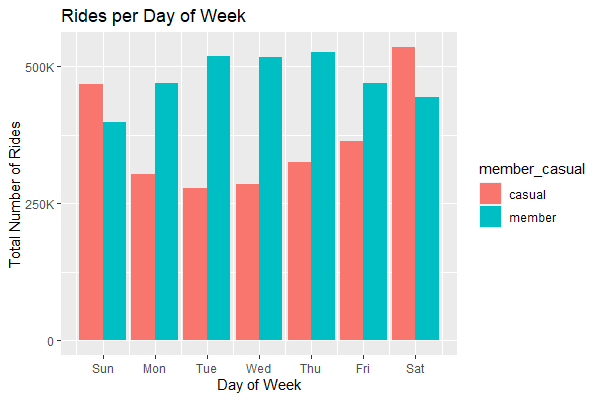

This first chart showcases the number of rides occured in each day of the week, it's clear that casual riders use the service more during the weekend as opposed to members whose numbers are higher across the working week.

A possible explanation is that casual members use the service for leisure whereas members ride to work, to find evidence of our hypothesis we plot in the following graph the numbers of rides occured at each hour of the day.

In [ ]:
complete_data %>% 
  group_by(start_hour, member_casual) %>% 
  summarise(total = n()) %>% 
  
  ggplot(aes(x = start_hour , y = total, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(breaks = c(0, 100000, 200000, 300000), labels = c("0", "100K", "200K", "300K"))+ 
  scale_x_continuous(breaks = c(0,3,6,9,12,15,18,21,24), labels= c("0:00", "3:00", "6:00","9:00", "12:00", "15:00", "18:00", "21:00", "24:00" ))

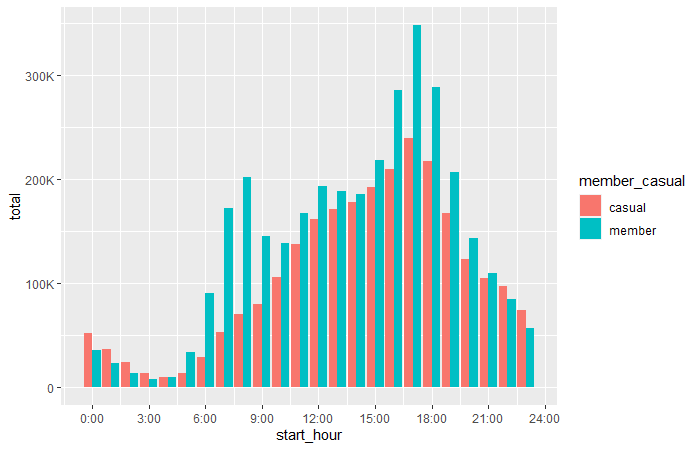
* The above graph indeed confirms our findings, in fact rides from members peak at 7:00 and 8:00 and at between 16:00 and 18:00, which are the moments of the day when people commute for work.

## Analyze the data monthly and seasonally 

In [ ]:
complete_data %>% 
  group_by(member_casual, month) %>% 
  summarise(total = n()) %>% 
  
  ggplot(aes(x = month, y = total, fill = member_casual)) + 
  geom_col(position= "dodge") + 
  labs(x='Month', y='Total Number of Rides', title='Rides per Month', fill = 'subs') + 
  scale_y_continuous(breaks = c(0, 250000, 400000), labels = c("0", "250K", "400K")) +
  scale_x_continuous(breaks = c(1,2,3,4,5,6,7,8,9,10,11,12), labels= c("Jan", "Feb", "Mar","Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec" ))

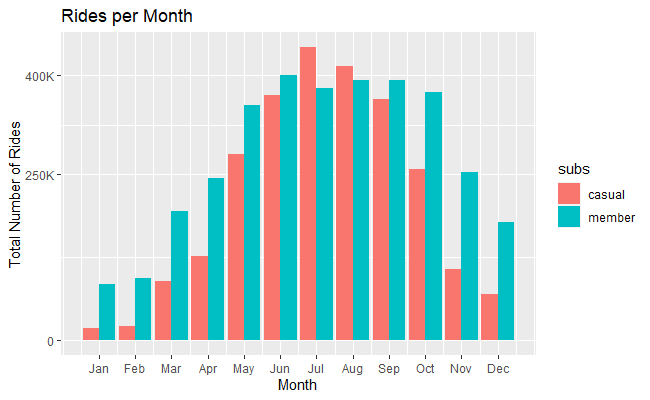

From the above graph showing the number of rides per months we understand that casual riders peak during the summer months. 

Thus a possible market strategy could be implementing a **summer membership**, to see how the volume during the summer compares to other periods we analyze the data seasonally in the following graph. 

In [ ]:
complete_data %>% 
  group_by(member_casual, season) %>% 
  summarise(total = n()) %>% 
  ggplot(aes(x = season, y = total, fill = member_casual)) + 
  geom_col(position= "dodge") + 
  labs(x='Season', y='Total Number of Rides', title='Season trends', fill = 'subs') + 
  scale_y_continuous(breaks = c(0, 500000, 1000000), labels = c("0", "500K", "1M")) +
  scale_x_continuous(breaks = c(1,2,3,4), labels= c("Spring", "Summer", "Autumn","Winter"))


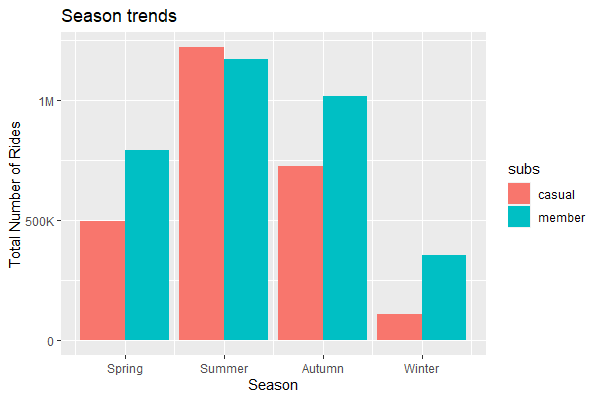

* The data further confirms the viability of the new business strategy.

In [ ]:
# an investigation into the average trip duration and how it differs between members and casual users
complete_data %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(total = n(), average = mean(minutes)) %>% 
  ggplot(aes(x = day_of_week, y = average, fill = member_casual)) +geom_col(position = "dodge")

complete_data %>% 
  group_by(member_casual, start_hour) %>% 
  summarise(total = n(), average = mean(minutes)) %>% 
  ggplot(aes(x = start_hour, y = average, fill = member_casual)) +geom_col(position = "dodge")

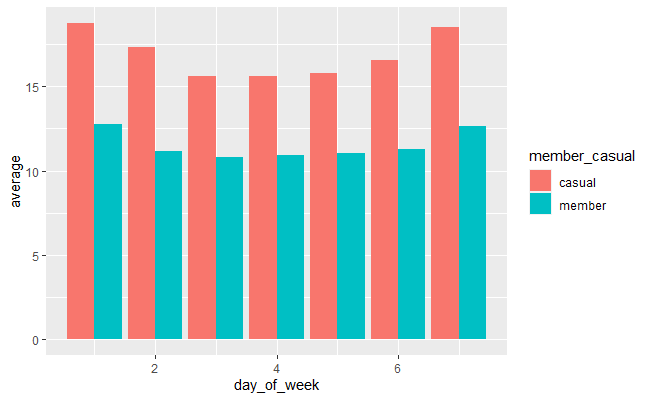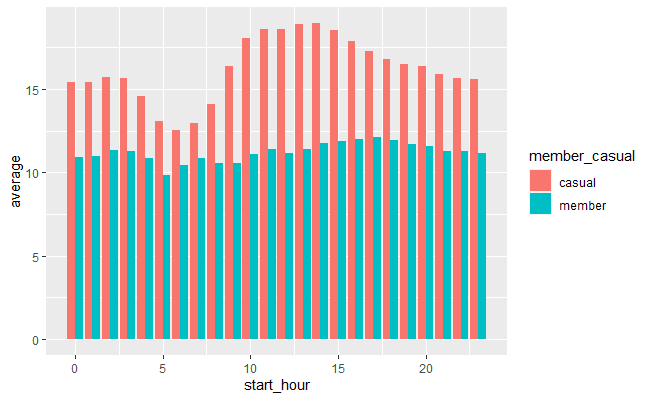

* An interesting patterned emerges: casual riders' trip duration is consistenly higher than members'!

In [ ]:
#(EXTRA) which type of bike is preferred?
complete_data %>% 
  group_by(rideable_type) %>% 
  summarise(total = n()) %>% 
  ggplot(aes(x="", y = total, fill = rideable_type))+
  geom_bar(stat="identity", width = 1)+ coord_polar("y", start = 0)

complete_data %>% 
    group_by(rideable_type, member_casual)%>% 
summarise(total = n())%>% 
ggplot(aes(x = rideable_type, y = total, fill = member_casual))+ geom_col()

#both casual and members prefer classic bikes and the docked type are the least used

# Our Findings
1. Casual riders use the service more during the week-end
2. Casual riders peak during the summer months
3. Casual riders on average use the service for more time each ride 
4. There is no difference in the preference of bike used between members and casual riders. 


# What to do going forward?

*The report suggests to adopt the following market strategies:*

* Implement a seasonal membership to maximize the revenue coming from casual riders in the summer that can then be extended for the entire year.
* Effectively advertise through media platforms the benefits that the fixed cost of a membership would bring as opposed to the time-dependent fee applied to casual users, as their average ride is longer. 

Thank you for your time and attention!

*By Yu Changchen*

13/11/2022